# Mileage Prediction


***

In [95]:
# Importing the libraries
import numpy as np #Use for linear algebra
import pandas as pd #Use for data processing
import matplotlib.pyplot as plt #Library for making the visualizations
import seaborn as sns #Library for making statistical graphics
from sklearn.model_selection import train_test_split # to randomly split data into train and test part
from sklearn.model_selection import StratifiedShuffleSplit #importing module for Stratified samplig
from sklearn.preprocessing import StandardScaler # to scale numerical values
from sklearn.impute import SimpleImputer # to impute missing values in Data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # to convert categorical features into numberical feature
from sklearn.pipeline import Pipeline # to build a data preprocessing pipeline
from sklearn.compose import ColumnTransformer # to create customize transformer

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures #Polynomial Algorithm
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import warnings # Use to ignore warnings
warnings.filterwarnings('ignore')

import os

In [69]:
# Setting Plotting variables
#sns.set_palette("GnBu_d")
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.top"] = True
plt.rcParams["axes.spines.right"] = True

In [70]:
# Loading Data
df= sns.load_dataset("mpg")

In [71]:
# Checking top 5 rows in dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [72]:
# Checking shape of data
df.shape

(398, 9)

We have total 398 rows and 9 columns in our dataset

In [73]:
# Checking information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


From the above details we can say that we have only one column i.e. `horsepower` which is having 6 null values.

Also, we can see that we have only 2 categorical columns: `origin` and `name`. Rest are numerical columns

In [74]:
# Let's check the statistics of numerical columns
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [75]:
#Let's check the null value again for our conformation
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

As we have seen above also that we have null values only in horsepower column and that is a numerical column than we are going to replace null values using median. This we will going to do using SimpleImputer while we are going to create a Pipeline 

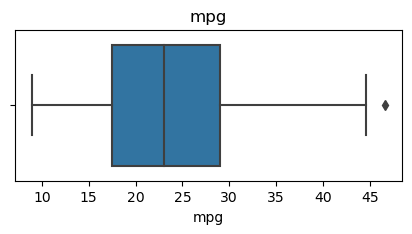

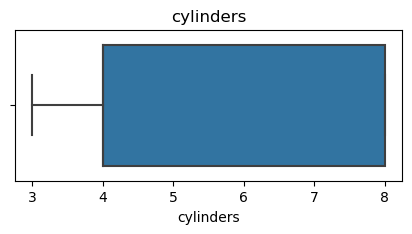

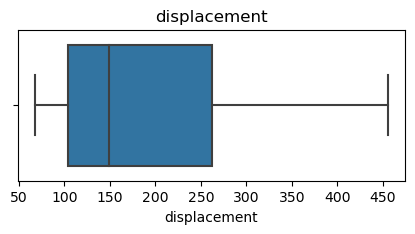

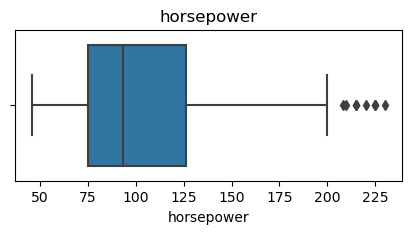

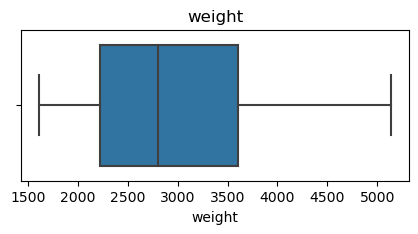

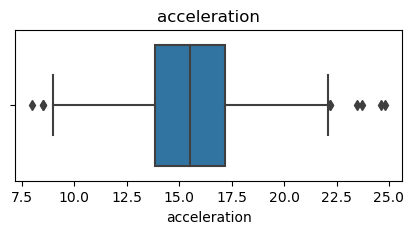

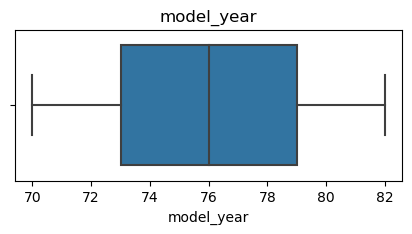

In [76]:
# Now, let's check the outliers if any in numerical data
plt.rcParams['figure.figsize'] = 5, 2
num_data = df.select_dtypes(include=["float64","int64"])
for col in num_data.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

From above plots, we can clearly see the outliers present in `horsepower` and `acceleration` columns.

Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.


In [77]:
# Creating a function to deal with ouliers
def outlier(df, column):
    df[column].describe
    Q1=df[column].describe().loc["25%"]
    Q3=df[column].describe().loc["75%"]
    IQR_hp=Q3-Q1
    top_limit=Q3 + 1.5*IQR_hp
    bottom_limit=Q1 - 1.5*IQR_hp
    for i in df[column]:
        if i > top_limit or i < bottom_limit:
            df[column] = df[column].replace(i, np.median(df[column]))
    return df
df = outlier(df,"acceleration")
df = outlier(df,"horsepower")

We have replaced all the outliers with median values. Sometimes it is not necessary to remove outliers as it can be easily covered when we do scaling

### Checking the correlation of every column with each other

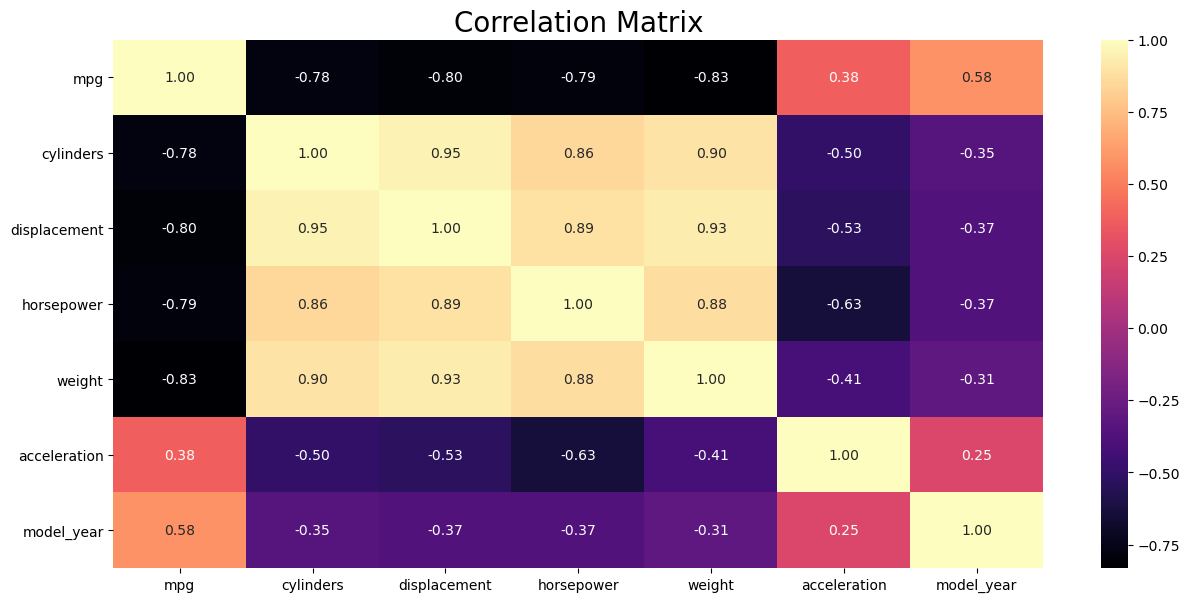

In [78]:
# Checking correlation using heat map
plt.rcParams['figure.figsize'] = 15, 7
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = "magma" )
plt.title("Correlation Matrix", fontsize=20)
plt.show()

### Seperating our features and target columns

In [79]:
target = 'mpg'
y = df[target]
X = df.drop(target, axis=1)

### Creating a pairplot to see the relation of features with the target value that is mpg

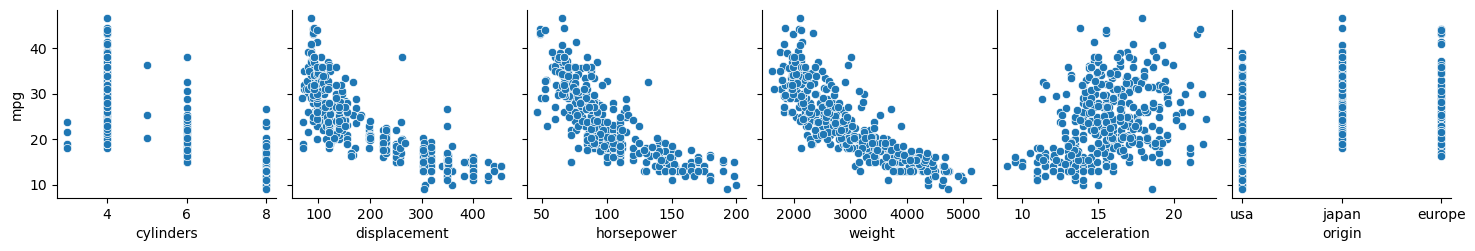

In [80]:
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'], y_vars=["mpg"], diag_kind = None)
plt.show()

From the above graphs, it is clear that `displacement`,`horsepower` and `weight` are making polynomial relation with the target.
So for these 3 features, we are going to create polynomial features for generating a best fit line to train our data. 

### Splitting the data into training and test using Stratified Sampling

In [81]:
# Creating a function for stratified sampling
def stratified_sample(X, y, col, test_size=0.2, random_state=123):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size,
                                  random_state=random_state)
    for train_idxs, test_idxs in split.split(X, X[col]):
        X_train = X.iloc[train_idxs]
        y_train = y.iloc[train_idxs]
        X_test  = X.iloc[test_idxs]
        y_test  = y.iloc[test_idxs]
    return X_train, X_test, y_train, y_test

In [82]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = stratified_sample(X, y, 'origin')

Now as we have done splitting of our data, let's check the shape of test and train data

In [83]:
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (318, 8)
Testing Set Shape: (80, 8)


In [84]:
# Let's check head of training data
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
392,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
345,4,81.0,60.0,1760,16.1,81,japan,honda civic 1300
397,4,119.0,82.0,2720,19.4,82,usa,chevy s-10
383,4,91.0,67.0,1965,15.0,82,japan,honda civic
68,8,350.0,155.0,4502,13.5,72,usa,buick lesabre custom


Above we can see that we have three categorical columns i.e. `cylinder`,`origin` and `name`.
We are going to drop `name` column as it is of no use for us in this analysis. We will going to use OneHotEncoder for `cylinder` and `origin` columns.

We are going to apply `PolynomialFeature` on `displacement`, `horsepower` and `weight` columns as they have polynomial relationship with target.

On `Acceleration` column we are going to use `StandardScalar`.

We are going to do everything by making a `Pipeline`

### Creating a Pipeline

In [85]:
# Let's create different columns to apply different functions on them
cat_features = ["cylinders","origin"]
poly_features = ["displacement","horsepower","weight"] 
num_features = ["acceleration"]
drop_features = ["name","model_year"] 

In [86]:
# Creating pipeline for polynomial colums
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('standard scaler', StandardScaler())
])

# Creating final pipeline
final_pipeline = ColumnTransformer([
        # (name, Transformer, column_list)
        ("categorical pipeline", OneHotEncoder(), cat_features),
        ("polynomial pipeline",poly_pipeline,poly_features),
        ("numerical pipeline", StandardScaler(), num_features),
        ('remove features', 'drop', drop_features)       
    ])

Now, as we have created a pipline to transform our data.

Let's define some of the functions to calculate `error` and `accuracy`

### Making a function to find out the Root mean squared error and Accuracy(r2 score)

In [87]:
# Function to calculate RSME score
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

# Function to generate Model Reports
def model_report(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        val_score = cross_validate(model, X_train, y_train, cv=5, scoring=["neg_mean_squared_error",'r2'])
        val_error = np.sqrt(-val_score['test_neg_mean_squared_error'])
        error = val_error[np.argmin(val_error)]
        val_acc = max(val_score['test_r2'])
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"Report For {name}".center(80))
        print()
        print(f"Training RMSE Error: {rmse(y_train, y_hat_train):.2f}" )
        print(f"Validation    Error: {error:.2f}" )
        print(f"Test     RMSE Error: {rmse(y_test, y_hat_test):.2f}")
        print()
        print(f"Training   Accuracy: {r2_score(y_train, y_hat_train):.2f}")
        print(f"Validation Accuracy: {val_acc:.2f}")
        print(f"Test       Accuracy: {r2_score(y_test, y_hat_test):.2f}")
        print('\n\n')

In [88]:
# Fitting and transforming train data
X_train_tr = final_pipeline.fit_transform(X_train)

# Transforming test data
X_test_tr  =  final_pipeline.transform(X_test)

# Models through which we want our data to be trained
models = [
        ('Linear Regression', LinearRegression()),
        ('SGD Regressor', SGDRegressor()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Support Vector Machines', SVR(kernel='linear')),
        ('Random Forest', RandomForestRegressor()),
        ('K-Nearest Neighbors', KNeighborsRegressor())
       ]
# Generating model reports
model_report(models, X_train_tr, X_test_tr, y_train, y_test)

________________________________________________________________________________
                          Report For Linear Regression                          

Training RMSE Error: 3.53
Validation    Error: 3.25
Test     RMSE Error: 4.33

Training   Accuracy: 0.79
Validation Accuracy: 0.84
Test       Accuracy: 0.71



________________________________________________________________________________
                            Report For SGD Regressor                            

Training RMSE Error: 3.72
Validation    Error: 3.23
Test     RMSE Error: 4.44

Training   Accuracy: 0.77
Validation Accuracy: 0.82
Test       Accuracy: 0.70



________________________________________________________________________________
                            Report For Decision Tree                            

Training RMSE Error: 0.12
Validation    Error: 3.96
Test     RMSE Error: 5.56

Training   Accuracy: 1.00
Validation Accuracy: 0.72
Test       Accuracy: 0.53



_______________________________

From the model reports we can see that `LinearRegressor` and `SGDRegressor` are giving good fit..

Let's try to hyper tune `SGDRegressor` model to get high accuracy using `GridSearchCV`

### Now doing hyperparameter tuning  and checking the Accuracy

In [93]:
# Setting the parameters
param_grid = [{
        'eta0' : [0.01,0.001,0.0001,0.1],
        'tol'  : [0.00001,0.0001,0.001,0.01,0.1], 
        'alpha': [0.1,0.01,0.001,0.0001]
       }] 
    
# Creating object of GridSearch
grid_search = GridSearchCV(SGDRegressor(early_stopping=True), param_grid, cv=5,
                      scoring="r2", return_train_score=True)

# fitting on training set
grid_search.fit(X_train_tr, y_train)

# Checking best parameters of best model
best_parameters = grid_search.best_params_
print(f"Best Parameters : {best_parameters}")
print("\n\n")

# Storing result of best model
result = grid_search.cv_results_

# Taking out training error
train_scores = np.round(result['mean_train_score'], 2)

# Taking out test error
test_scores  = np.round(result['mean_test_score'], 2)

# Parameters used for finding accuracy
parameters = result['params']

# Storing train error, test error and parameters in a list
scores = [ (tr, ts, pr) for tr, ts, pr in zip(train_scores, test_scores, parameters) ]

# Sorting the score
scores.sort(key=lambda x:x[1], reverse=True)

# Top 10 Models
print("Top 10 Models")
strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores[:10]):
    print(strformat.format(ix+1, tr, ts, pr, lb))

Best Parameters : {'alpha': 0.0001, 'eta0': 0.1, 'tol': 0.01}



Top 10 Models
|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |        0.76        |         0.75        | {'alpha': 0.0001, 'eta0': 0.1, 'tol': 0.01}|
______________________________________________________________________________________________________________

|2    |        0.75        |         0.73        | {'alpha': 0.01, 'eta0': 0.01, 'tol': 1e-05}|
______________________________________________________________________________________________________________

|3    |        0.75        |         0.73        | {'alpha': 0.01, 'eta0': 0.01, 'tol': 0.001}|
______________________________________________________________________________________________________________

|4    |        0.75        |         0.73        | {'alpha': 0.001, 'eta0': 0.1, 'tol': 1e-05}|
__________________________

Let's use the parameters used in 2nd top model as it is giving the good fit model.

Using the above hyper parameters to set for SGD model, checking the Accuracy and score again.

### Now again checking the accuracy using hyperparameter in SGD model 

In [101]:
# Importing the libraries
import numpy as np #Use for linear algebra
import pandas as pd #Use for data processing
import matplotlib.pyplot as plt #Library for making the visualizations
import seaborn as sns #Library for making statistical graphics
from sklearn.model_selection import train_test_split # to randomly split data into train and test part
from sklearn.model_selection import StratifiedShuffleSplit #importing module for Stratified samplig
from sklearn.preprocessing import StandardScaler # to scale numerical values
from sklearn.impute import SimpleImputer # to impute missing values in Data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # to convert categorical features into numberical feature
from sklearn.pipeline import Pipeline # to build a data preprocessing pipeline
from sklearn.compose import ColumnTransformer # to create customize transformer

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures #Polynomial Algorithm
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import warnings # Use to ignore warnings
warnings.filterwarnings('ignore')

import os

# Loading Data
df= sns.load_dataset("mpg")

# Function to calculate RSME score
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

# Function to generate Model Reports
def model_report(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        val_score = cross_validate(model, X_train, y_train, cv=5, scoring=["neg_mean_squared_error",'r2'])
        val_error = np.sqrt(-val_score['test_neg_mean_squared_error'])
        error = val_error[np.argmin(val_error)]
        val_acc = max(val_score['test_r2'])
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"Report For {name}".center(80))
        print()
        print(f"Training RMSE Error: {rmse(y_train, y_hat_train):.2f}" )
        print(f"Validation    Error: {error:.2f}" )
        print(f"Test     RMSE Error: {rmse(y_test, y_hat_test):.2f}")
        print()
        print(f"Training   Accuracy: {r2_score(y_train, y_hat_train):.2f}")
        print(f"Validation Accuracy: {val_acc:.2f}")
        print(f"Test       Accuracy: {r2_score(y_test, y_hat_test):.2f}")
        print('\n\n')

# Creating a function to deal with ouliers
def outlier(df, column):
    df[column].describe
    Q1=df[column].describe().loc["25%"]
    Q3=df[column].describe().loc["75%"]
    IQR_hp=Q3-Q1
    top_limit=Q3 + 1.5*IQR_hp
    bottom_limit=Q1 - 1.5*IQR_hp
    for i in df[column]:
        if i > top_limit or i < bottom_limit:
            df[column] = df[column].replace(i, np.median(df[column]))
    return df
df = outlier(df,"acceleration")
df = outlier(df,"horsepower")

# Seperating target and features
target = 'mpg'
y = df[target]
X = df.drop(target, axis=1)

# Creating a function for stratified sampling
def stratified_sample(X, y, col, test_size=0.2, random_state=123):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size,
                                  random_state=random_state)
    for train_idxs, test_idxs in split.split(X, X[col]):
        X_train = X.iloc[train_idxs]
        y_train = y.iloc[train_idxs]
        X_test  = X.iloc[test_idxs]
        y_test  = y.iloc[test_idxs]
    return X_train, X_test, y_train, y_test

# Splitting data into train and test set
X_train, X_test, y_train, y_test = stratified_sample(X, y, 'origin')

# Let's create different columns to apply different functions on them
cat_features = ["cylinders","origin"]
poly_features = ["displacement","horsepower","weight"] 
num_features = ["acceleration"]
drop_features = ["name","model_year"] 

# Creating pipeline for polynomial colums
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('standard scaler', StandardScaler())
])

# Creating final pipeline
final_pipeline = ColumnTransformer([
        # (name, Transformer, column_list)
        ("categorical pipeline", OneHotEncoder(), cat_features),
        ("polynomial pipeline",poly_pipeline,poly_features),
        ("numerical pipeline", StandardScaler(), num_features),
        ('remove features', 'drop', drop_features)       
    ])

# Fitting and transforming train data
X_train_tr = final_pipeline.fit_transform(X_train)

# Transforming test data
X_test_tr  =  final_pipeline.transform(X_test)

# Models through which we want our data to be trained
models = [
        ('Linear Regression', Ridge(alpha=0.6)),
        ('SGD Regressor', SGDRegressor(eta0 = 0.1, tol = 0.01, early_stopping = True))]


# Generating model reports
model_report(models, X_train_tr, X_test_tr, y_train, y_test)

________________________________________________________________________________
                          Report For Linear Regression                          

Training RMSE Error: 3.55
Validation    Error: 3.21
Test     RMSE Error: 4.33

Training   Accuracy: 0.79
Validation Accuracy: 0.84
Test       Accuracy: 0.71



________________________________________________________________________________
                            Report For SGD Regressor                            

Training RMSE Error: 3.76
Validation    Error: 3.04
Test     RMSE Error: 4.58

Training   Accuracy: 0.76
Validation Accuracy: 0.85
Test       Accuracy: 0.68





***
**Tried first time with hyperparmater tuning, but the conclusion was the accuracy of SGD model with the hyperparameter comes out to be less as compared without it.**


***